# Exploratory Analysis 
Exploring distributions and making sure there are no outliers, that will unfairly affect the Machine learning models, in these features:
Runtime, IMDb Rating, Year, Number of Votes, Day Rated, Genre and Title Type.

In [41]:
from cleaned import ratings_df, df
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy 


### Runtime (mins) - Before changes

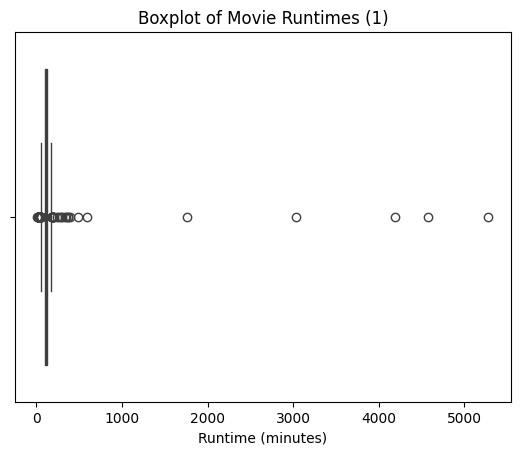

In [42]:
ratings_old = pd.read_csv("imdb_ratings.csv") #* Have to create a different df so chained assignment doesn't occur and can therefor visualise the difference
# print(ratings_old["Runtime (mins)"].describe())

#? This boxplot shows Signifcant outliers, majorly affecting the data and needs to be fixed!
sns.boxplot(x=ratings_old['Runtime (mins)'])
plt.title('Boxplot of Movie Runtimes (1)')
plt.xlabel('Runtime (minutes)')
plt.show()


## Runtime (mins) - After changes, 
Runtime (mins) - for TvShows is predominantly done by length of episode but in the cases listed below, the total length of the show is used (Number of episodes x ep length), corrupting the data.

Using the rule that a movie should not be longer than 4 hours, anything longer is altered to episode runtime, (Rather than removing these points)


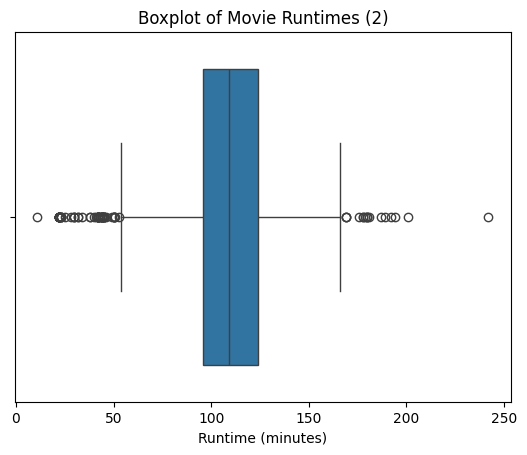

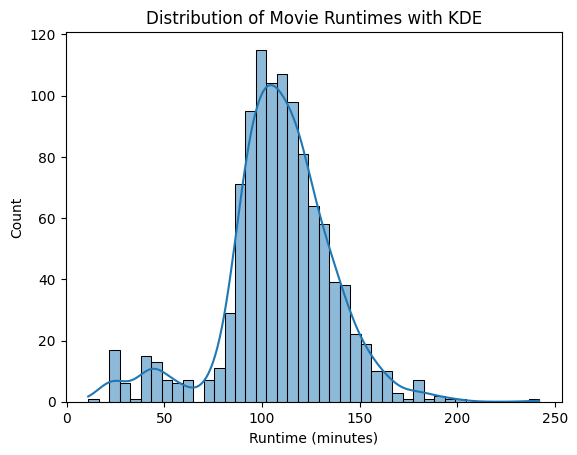

In [43]:
filtered_df = ratings_old[ratings_old["Runtime (mins)"] > 240]
# print(filtered_df.Title) # --- This print statement shows the list of shows with incorrect runtimes.

sample_numbers = [4, 10, 58, 247, 828, 883, 932, 980, 983, 1013, 1019, 1020, 1022, 1039, 1052]
correct_runtimes = [54, 42, 23, 49, 23, 44, 46, 42, 38, 44, 34, 28, 32, 56, 41] # Googled These 

ratings_df.loc[sample_numbers, "Runtime (mins)"] = correct_runtimes

#? Comparison between box plots
sns.boxplot(x=ratings_df['Runtime (mins)'])
plt.title('Boxplot of Movie Runtimes (2)')
plt.xlabel('Runtime (minutes)')
plt.show()

# print(ratings_df["Runtime (mins)"].describe()) # --- Data significantly improved in particular std 266 -> 26

#? New Distribution shown
sns.histplot(ratings_df['Runtime (mins)'], kde=True)
plt.title('Distribution of Movie Runtimes with KDE')
plt.xlabel('Runtime (minutes)')
plt.show()

## IMDb Rating 

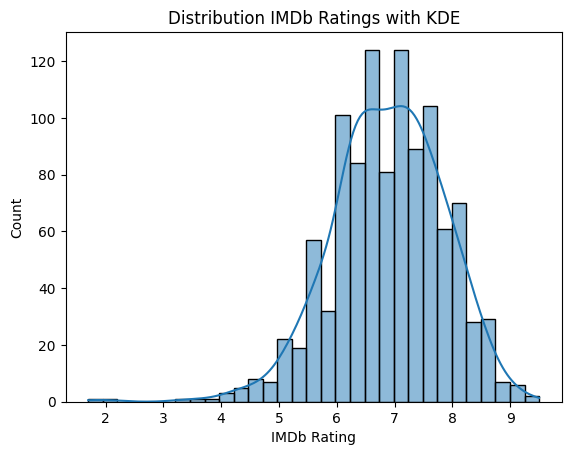

In [44]:
# print(ratings_df["IMDb Rating"].describe())

sns.histplot(ratings_df['IMDb Rating'], kde=True)
plt.title('Distribution IMDb Ratings with KDE')
plt.xlabel('IMDb Rating')
plt.show()

## Year

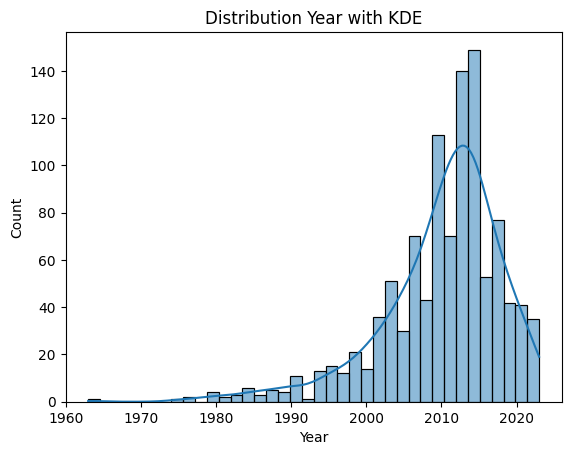

In [45]:
# print(ratings_df["Year"].describe())

sns.histplot(ratings_df['Year'], kde=True)
plt.title('Distribution Year with KDE')
plt.xlabel('Year')
plt.show()

## Number of Votes

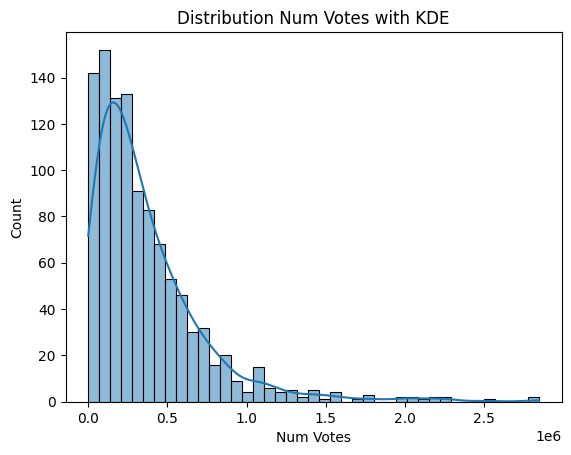

In [46]:
# print(ratings_df["Num Votes"].describe())

sns.histplot(ratings_df['Num Votes'], kde=True)
plt.title('Distribution Num Votes with KDE')
plt.xlabel('Num Votes')
plt.show()

## Day Rated 

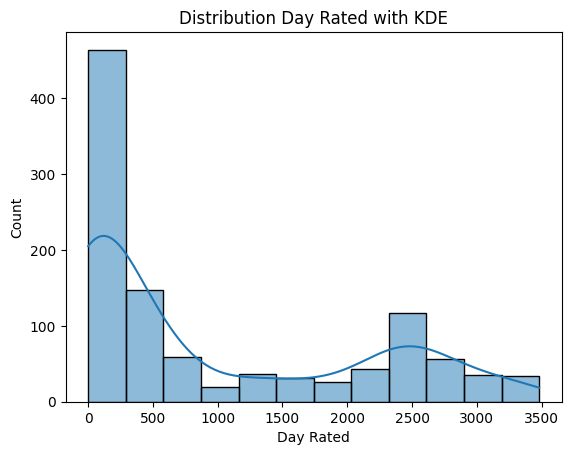

In [47]:
# print(ratings_df["Day_Rated"].describe())

#*Day 0 = 5/7/2014
# Distribution can be explained by the fact, upon creating the account on day 0 I did numerous ratings off memory
sns.histplot(ratings_df['Day_Rated'], kde=True)
plt.title('Distribution Day Rated with KDE')
plt.xlabel('Day Rated')
plt.show()

## Genre

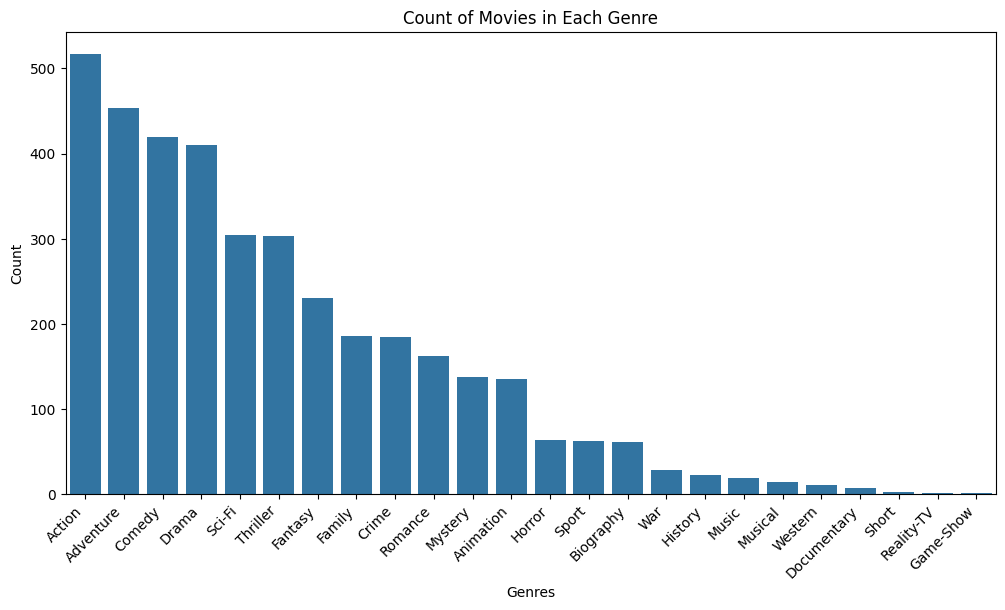

In [48]:

#? Different approach needed for these variables that have been one-hot encoded..
genres_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
                  'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
                  'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

genre_counts = ratings_df[genres_columns].sum()
genre_counts = genre_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Count of Movies in Each Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

## Title Type

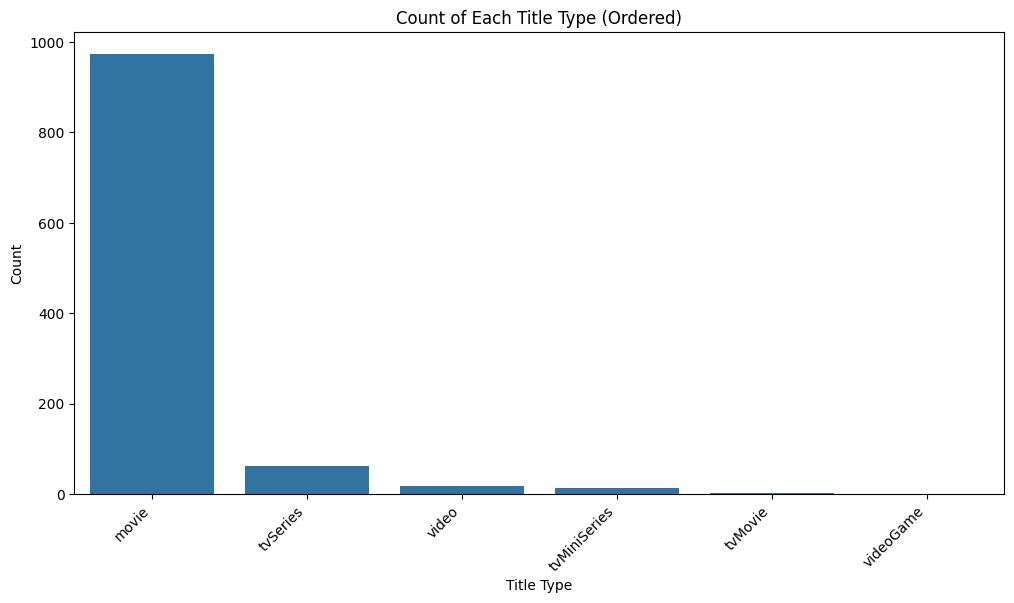

In [49]:
# Also one-hot encoded therefor same approach as genres
title_type_columns = ['movie', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video', 'videoGame']

title_type_counts = ratings_df[title_type_columns].sum()
title_type_counts = title_type_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=title_type_counts.index, y=title_type_counts.values)
plt.title('Count of Each Title Type (Ordered)')
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

## My Rating

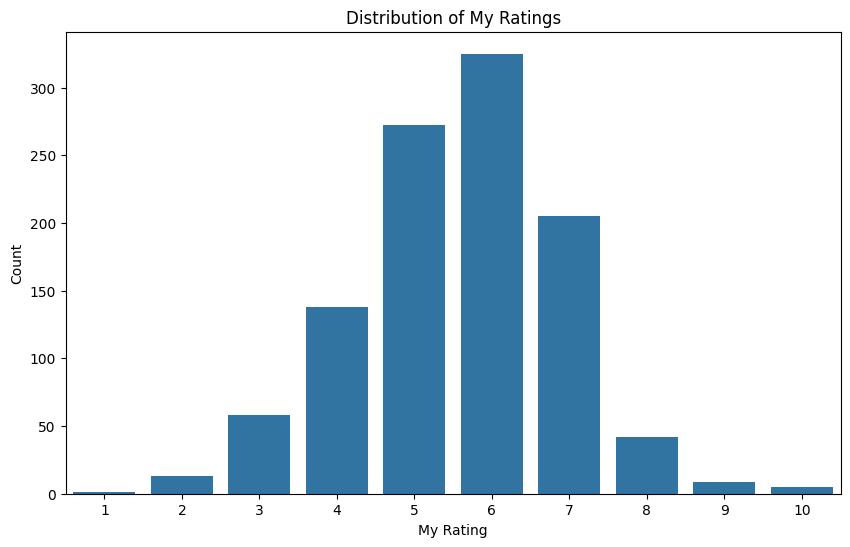

In [50]:
# print(ratings_df["Your Rating"].describe())

plt.figure(figsize=(10, 6))
sns.countplot(x='Your Rating', data=ratings_df)
plt.title('Distribution of My Ratings')
plt.xlabel('My Rating')
plt.ylabel('Count')
plt.show()
